In [1]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
def DFtoUSE(df,rpc_threshfold,Normal_RP,MS2_RP,RNAseq):
    RP_include = df['gene'].isin(df['gene']) # just make all rows to be TRUE 
    MS2_include = RP_include # just make all rows to be TRUE 
    RNA_include = RP_include # just make all rows to be TRUE
    if Normal_RP != 'no':
        RP_include = df[Normal_RP+'_rpc'] > rpc_threshfold
    if MS2_RP != 'no':
        MS2_include = df[MS2_RP+'_rpc'] > rpc_threshfold
    if RNAseq != 'no':
        RNA_include = df[RNAseq+'_rpc'] > rpc_threshfold
    df_to_use = df[RP_include & MS2_include & RNA_include]
    return df_to_use

In [3]:
df_base_CDS = pd.read_csv('rrf_CDS.csv')
df_base_CDS = df_base_CDS.loc[:,~df_base_CDS.columns.str.contains('^Unnamed')]

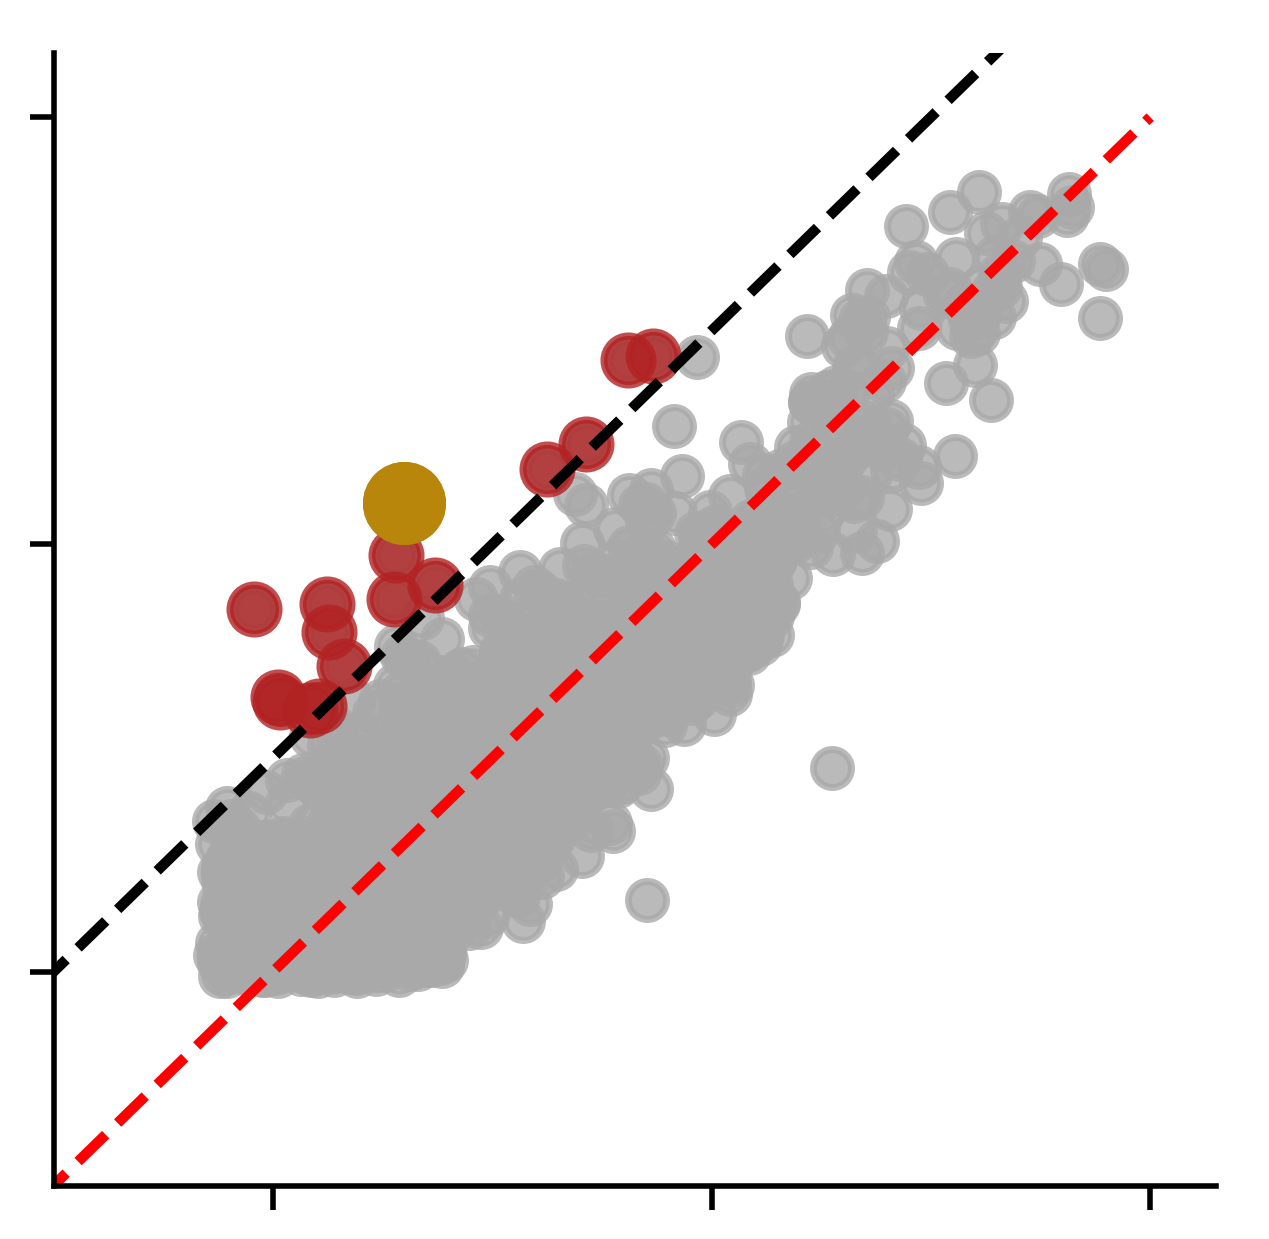

In [4]:
base_Normal_RP = 'ks7'
base_MS2_RP = 'no'
base_RNAseq = 'no'

Normal_RP = 'ks10'
MS2_RP = 'no'
RNAseq = 'no'

dotcolor='darkgrey'
rpc_threshfold = 0.05

df_basecutoff = DFtoUSE(df_base_CDS,rpc_threshfold,base_Normal_RP,base_MS2_RP,base_RNAseq)
df_to_use = DFtoUSE(df_basecutoff,rpc_threshfold,Normal_RP,MS2_RP,RNAseq)

high_normal = df_to_use['ks10_rpkm']/df_to_use['ks7_rpkm'] >=10
others_list = df_to_use[high_normal]['gene'].values
others = df_to_use['gene'].isin(others_list)
arfA = df_to_use['gene'].isin(['arfA'])

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(3, 3) 

ax = sns.regplot(x=df_to_use[base_Normal_RP+'_rpkm'].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                y=df_to_use[Normal_RP+'_rpkm'].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                fit_reg=False,
                color=dotcolor,
                scatter_kws={'s': 30})

ax = sns.regplot(x=df_to_use[others][base_Normal_RP+'_rpkm'].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                y=df_to_use[others][Normal_RP+'_rpkm'].apply(np.log10).replace([np.inf,-np.inf],np.nan),
                fit_reg=False,
                color='firebrick',
                scatter_kws={'s': 50})

arfA_WT = df_to_use[arfA][base_Normal_RP+'_rpkm'].apply(np.log10).replace([np.inf,-np.inf],np.nan).values[0]
arfA_KO = df_to_use[arfA][Normal_RP+'_rpkm'].apply(np.log10).replace([np.inf,-np.inf],np.nan).values[0]
ax = sns.regplot(x=[arfA_WT,arfA_WT],
                y=[arfA_KO,arfA_KO],
                fit_reg=False,
                color='darkgoldenrod',
                scatter_kws={'s': 120,'alpha':1.0})

x = np.linspace(-5,5,100)
plt.plot(x, x, '--',color='red')
plt.plot(x, x+1, '--',color='black')
#plt.plot(x, x-1, '--',color='black')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xlim(0,5.3)
ax.set_ylim(0,5.3)
plt.xticks([1,3,5],['','',''])
plt.yticks([1,3,5],['','',''])
plt.tick_params(labelsize=6)

#plt.savefig('figs_rpkm/fig_rpkm_scatter.pdf', dpi=500)